<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#OS" data-toc-modified-id="OS-4.1">OS</a></span><ul class="toc-item"><li><span><a href="#Cox" data-toc-modified-id="Cox-4.1.1">Cox</a></span></li></ul></li><li><span><a href="#PFS" data-toc-modified-id="PFS-4.2">PFS</a></span><ul class="toc-item"><li><span><a href="#Cox" data-toc-modified-id="Cox-4.2.1">Cox</a></span></li></ul></li></ul></li><li><span><a href="#Gender" data-toc-modified-id="Gender-5">Gender</a></span></li><li><span><a href="#Ethnicity" data-toc-modified-id="Ethnicity-6">Ethnicity</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-7">Age</a></span></li><li><span><a href="#NBL-INSS" data-toc-modified-id="NBL-INSS-8">NBL INSS</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(survival)
library(survminer)
library(forestmodel)
library(dplyr)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")

In [4]:
KM_plot <- function(metadata, fit_model, col, title, ylab, legendlabs){
    kmplot <- ggsurvplot(fit_model, data = metadata,
                         palette = as.vector(col),conf.int=FALSE, 
                         xlim = c(0,5000),break.x.by = 1000,
                         #Risk table
                         risk.table = TRUE,
                         # pvalue
                         pval = TRUE, pval.size = 10, pval.coord = c(200, 0.1),
                         # legend
                         legend.title="", font.legend = 25, legend.labs = legendlabs, legend = c(0.75, 0.9),
                         # fonts
                         font.main = 30, font.x = 30, font.y = 30, font.tickslab = 30, 
                         # titles
                         title = title, xlab = "Time (days)", ylab = ylab)
    

    
    kmplot$table <- ggrisktable(fit_model, data = metadata, 
                                color = "strata", palette = as.vector(col),
                                fontsize = 10, risk.table.title = "",
                                xlim = c(0,5000),break.time.by = 1000,
                                y.text = TRUE, ylab = "",  xlab = "",legend.labs = legendlabs,
                                tables.theme = theme_cleantable(), font.tickslab = 20)

    return(kmplot)
}

In [5]:
stacked_plots <- function(freqtab, var1, var2){

    myplot <- ggplot(freqtab, aes(fill = eval(as.name(var2)), y = freq, x = eval(as.name(var1)))) + 
    geom_bar(position="stack", stat="identity") +
 #   scale_fill_brewer(palette = color) + 
    theme(axis.title.y = element_text(size = 45),
          axis.title.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text.x = element_text(size = 45,angle = 45, hjust = 1, color = "black"),
          axis.text.y = element_text(size = 45, color = "black")) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          plot.background = element_rect(fill = "transparent", colour = NA),
          plot.title = element_text(size = 45)) +
    theme(legend.position = "right", legend.direction="vertical",
          legend.text = element_text(size = 45),
          legend.key.height= unit(2, 'cm'),
          legend.key.width= unit(2, 'cm'),
          legend.title = element_blank())
    
    return(myplot)
}

# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"

# Main

In [7]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [8]:
metadata_IC$percread <- 8.0947988*exp(metadata_IC$ImmuneScore*0.0006267)

## OS

In [9]:
metadata_IC$vital_status <- as.numeric(as.character(metadata_IC$vital_status))

In [10]:
cluster_names <- c("Pediatric inflamed", "Myeloid driven", "Pediatric cold", "Immune excluded")

In [11]:
sfit <- survfit(Surv(days_to_death, vital_status)~ immune_cluster, data=metadata_IC)
IC_KM_OS <- KM_plot(metadata_IC, sfit, cluster_col, "Immune cluster", "Overall survival", cluster_names)

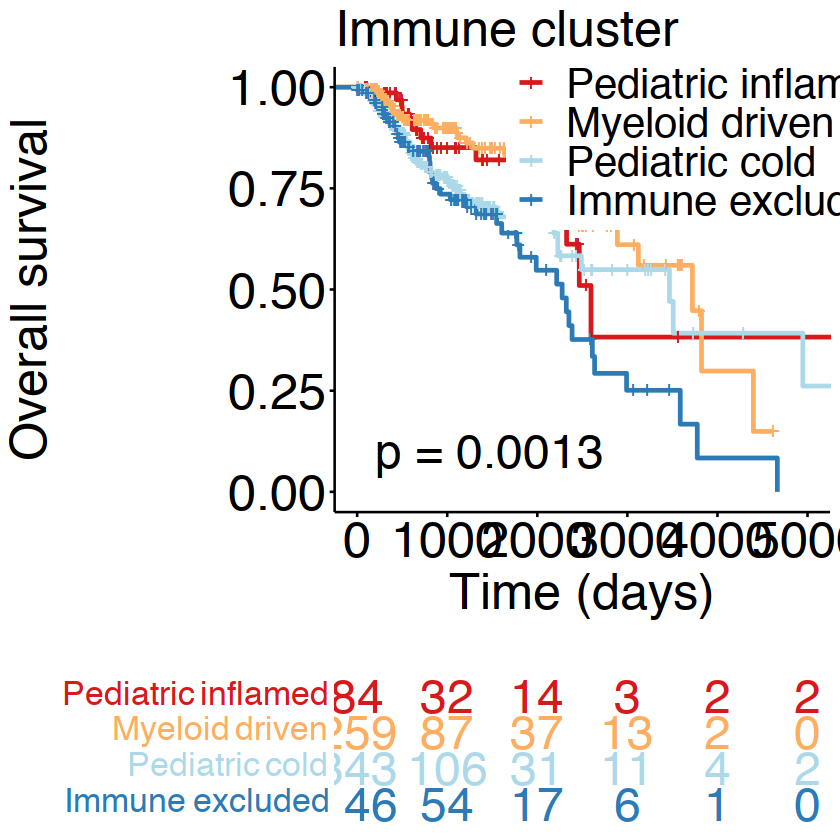

In [12]:
IC_KM_OS

In [13]:
pdf(paste0(plotpath, "IC_KM_OS.pdf"),
   width = 10, height = 12, onefile = F)

IC_KM_OS

dev.off()

pdf 
  2

In [14]:
# just to align colors to clusters according to the immunity paper
metadata_IC$CRI_cluster <- factor(metadata_IC$CRI_cluster, levels = names(cri_col))

In [15]:
table(metadata_IC$CRI_cluster)


        Wound Healing    IFN-gamma dominant          Inflammatory 
                   64                    26                   148 
  Lymphocyte depleted Immunologically quiet      TGFbeta dominant 
                  554                   110                     6 

In [16]:
sfit <- survfit(Surv(days_to_death, vital_status)~ CRI_cluster, data=metadata_IC)
CRI_KM_OS <- KM_plot(metadata_IC, sfit, cri_col, "CRI-iAtlas clusters", "Overall survival", names(cri_col))

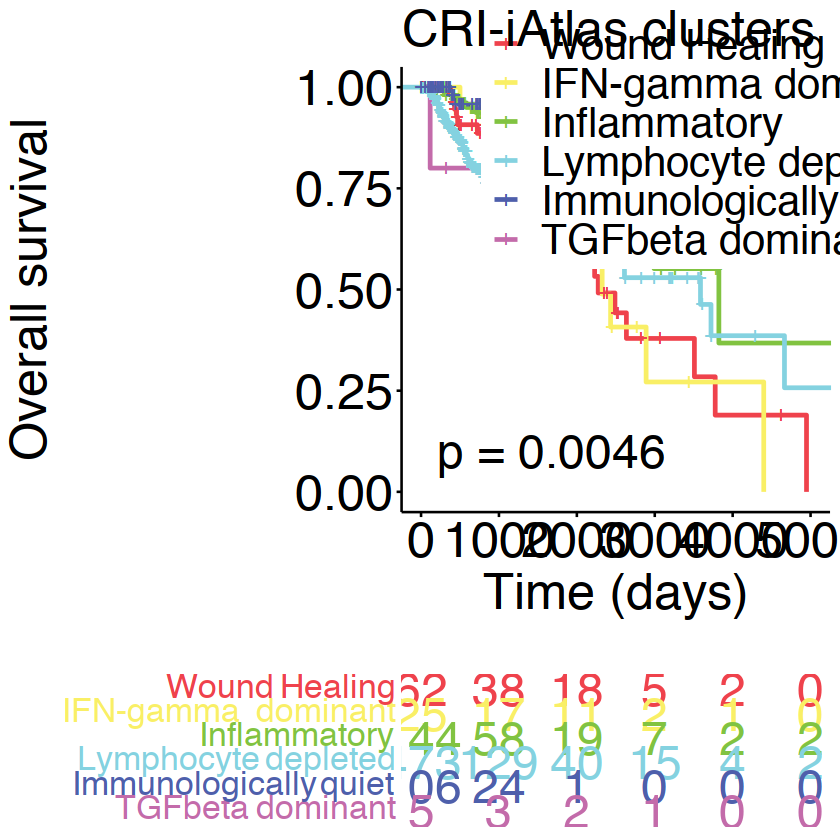

In [17]:
CRI_KM_OS

In [18]:
pdf(paste0(plotpath, "CRI_KM_OS.pdf"),
   width = 10, height = 12, onefile = F)

CRI_KM_OS

dev.off()

pdf 
  2

### Cox

In [19]:
coxmodel <- coxph(Surv(days_to_death, vital_status)~ immune_cluster + cohort + 
                  gender, data= metadata_IC) 

summary(coxmodel)

Warning message in fitter(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”


Call:
coxph(formula = Surv(days_to_death, vital_status) ~ immune_cluster + 
    cohort + gender, data = metadata_IC)

  n= 834, number of events= 161 
   (91 observations deleted due to missingness)

                                           coef         exp(coef)
immune_clusterMyeloid-driven     0.113316189727    1.119986005038
immune_clusterPediatric cold     0.442978416752    1.557338721551
immune_clusterImmune excluded    0.677091228722    1.968144515726
cohortCP                        -1.709462012037    0.180963122415
cohortCPH                       -2.269994374749    0.103312761242
cohortEPN                       -2.110805037537    0.121140404595
cohortETMR                       3.614238491702   37.123065636631
cohortMB                        -1.598739103050    0.202151249260
cohortMNG                      -18.611280544253    0.000000008265
cohortNBL                       -0.964337783600    0.381235576617
cohortNFB                       -0.979358561130    0.375551915205
cohortpe

In [20]:
summary_cox <- summary(coxmodel)

In [21]:
mycox <- cbind(summary_cox$coefficients, summary_cox$conf.int[,c("lower .95","upper .95")])

In [22]:
rownames(mycox) <- gsub("immune_cluster", "", rownames(mycox))
rownames(mycox) <- gsub("cohort", "", rownames(mycox))

In [23]:
write.csv(mycox, file = paste0(datapath,"Cox/IC_OS_Cox_cohort.csv"))

In [24]:
xlsx::write.xlsx(mycox, file = "~/OneDrive - UHN//Documents/Manuscripts/IPD/v9/TableS5.xlsx")

## PFS

In [25]:
metadata_IC$recurrence <- as.numeric(as.character(metadata_IC$recurrence))

In [26]:
sfit <- survfit(Surv(days_to_progress, recurrence)~ immune_cluster, data=metadata_IC)
IC_KM_PFS <- KM_plot(metadata_IC, sfit, cluster_col, "Immune clusters", "Progression-free survival", cluster_names)

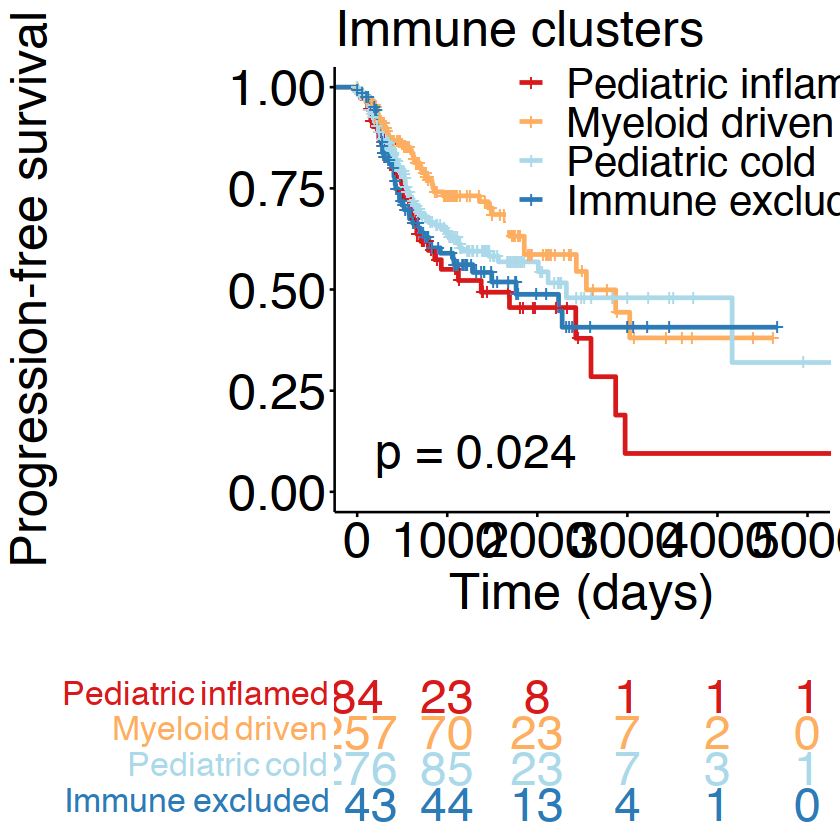

In [27]:
IC_KM_PFS

In [28]:
pdf(paste0(plotpath, "IC_KM_PFS.pdf"),
   width = 10, height = 12, onefile = F)

IC_KM_PFS

dev.off()

pdf 
  2

In [29]:
sfit <- survfit(Surv(days_to_progress, recurrence)~ CRI_cluster, data=metadata_IC)
CRI_KM_PFS <- KM_plot(metadata_IC, sfit, cri_col, "CRI-iAtlas clusters", "Progression-free survival", names(cri_col))

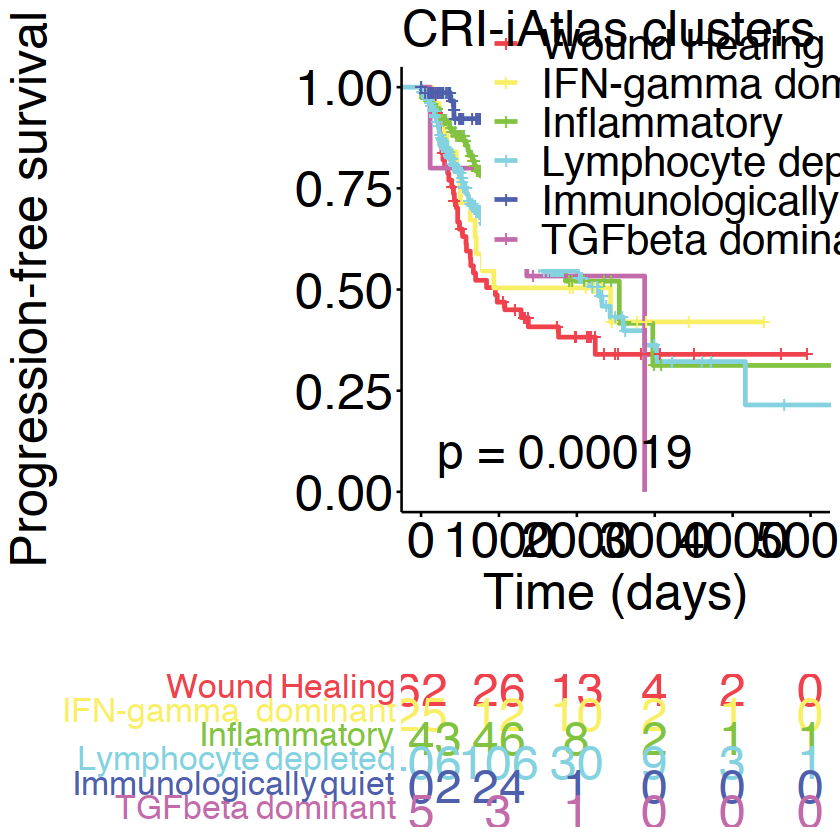

In [30]:
CRI_KM_PFS

In [31]:
pdf(paste0(plotpath, "CRI_KM_PFS.pdf"),
   width = 10, height = 12, onefile = F)

CRI_KM_PFS

dev.off()

pdf 
  2

### Cox

In [32]:
coxmodel <- coxph(Surv(days_to_progress, recurrence) ~ immune_cluster + cohort + 
                  gender, data= metadata_IC)
summary(coxmodel)

Call:
coxph(formula = Surv(days_to_progress, recurrence) ~ immune_cluster + 
    cohort + gender, data = metadata_IC)

  n= 762, number of events= 217 
   (163 observations deleted due to missingness)

                                  coef exp(coef) se(coef)      z     Pr(>|z|)
immune_clusterMyeloid-driven  -0.38771   0.67861  0.22545 -1.720     0.085490
immune_clusterPediatric cold  -0.22653   0.79730  0.21747 -1.042     0.297566
immune_clusterImmune excluded -0.04266   0.95823  0.24301 -0.176     0.860635
cohortCP                      -1.92503   0.14587  1.03471 -1.860     0.062822
cohortCPH                     -2.74349   0.06435  1.03672 -2.646     0.008138
cohortEPN                     -1.18162   0.30678  0.39165 -3.017     0.002553
cohortETMR                     2.90161  18.20345  1.06413  2.727     0.006396
cohortMB                      -1.35209   0.25870  0.36052 -3.750     0.000177
cohortMNG                     -0.58200   0.55878  0.56917 -1.023     0.306521
cohortNBL         

In [33]:
summary_cox <- summary(coxmodel)

In [34]:
mycox <- cbind(summary_cox$coefficients, summary_cox$conf.int[,c("lower .95","upper .95")])

In [35]:
rownames(mycox) <- gsub("immune_cluster", "", rownames(mycox))
rownames(mycox) <- gsub("cohort", "", rownames(mycox))

In [36]:
write.csv(mycox, file = paste0(datapath,"Cox/IC_PFS_Cox_cohort.csv"))

In [37]:
xlsx::write.xlsx(mycox, file = "~/OneDrive - UHN//Documents/Manuscripts/IPD/v9/TableS6.xlsx")

# Gender

In [38]:
metadata_gender <- metadata_IC[!is.na(metadata_IC$gender),]
metadata_gender <- metadata_gender[metadata_gender$gender != "Unknown",]

In [39]:
table(metadata_gender$gender, metadata_gender$immune_cluster)

        
         Pediatric inflamed Myeloid-driven Pediatric cold Immune excluded
  Female                 44            138            169              57
  Male                   46            140            222             105

In [40]:
freqtab <- metadata_gender %>% group_by(cohort,gender) %>%
    summarise(n = n()) %>% mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'cohort'. You can override using the `.groups` argument.



In [41]:
females <- freqtab[ freqtab$gender == "Female",]
females <- females[order(females$freq),]

In [42]:
freqtab$cohort <- factor(freqtab$cohort, levels = females$cohort)

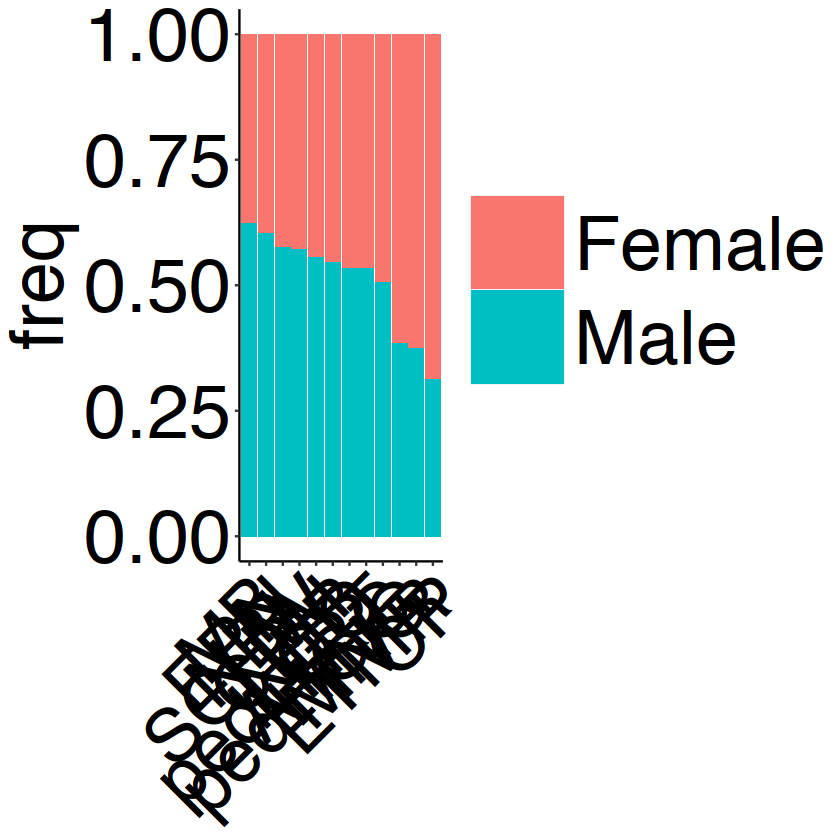

In [43]:
stacked_plots(freqtab, "cohort", "gender")

In [44]:
pdf(paste0(plotpath, "gender_cohort_plot.pdf"),
   width = 20, height = 10, onefile = F)


stacked_plots(freqtab, "cohort", "gender")

dev.off()

pdf 
  2

In [45]:
freqtab <- metadata_gender %>% group_by(immune_cluster,gender) %>%
    summarise(n = n()) %>% mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'immune_cluster'. You can override using the `.groups` argument.



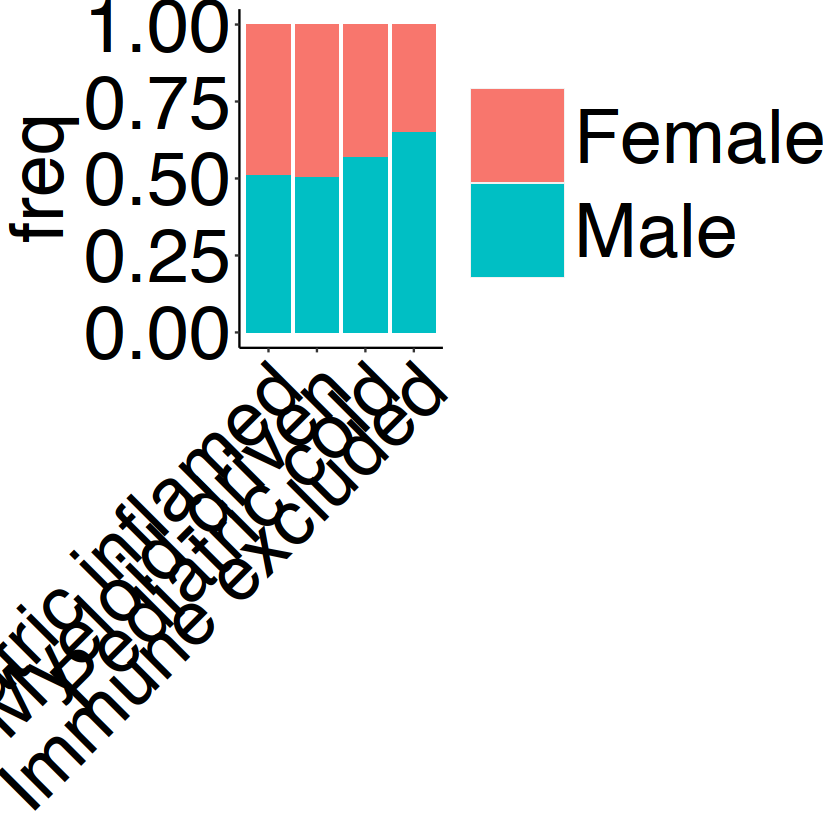

In [46]:
stacked_plots(freqtab, "immune_cluster", "gender")

In [47]:
pdf(paste0(plotpath, "gender_IC_plot.pdf"),
   width = 12, height = 10, onefile = F)


stacked_plots(freqtab, "immune_cluster", "gender")

dev.off()

pdf 
  2

In [48]:
rms::lrm(gender ~ immune_cluster + cohort, data = metadata_gender)

Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numericVector" of class "Mnumeric"; definition not updated”


Logistic Regression Model
 
 rms::lrm(formula = gender ~ immune_cluster + cohort, data = metadata_gender)
 
                       Model Likelihood    Discrimination    Rank Discrim.    
                             Ratio Test           Indexes          Indexes    
 Obs           921    LR chi2     19.39    R2       0.028    C       0.580    
  Female       408    d.f.           14    g        0.320    Dxy     0.159    
  Male         513    Pr(> chi2) 0.1506    gr       1.377    gamma   0.173    
 max |deriv| 3e-08                         gp       0.077    tau-a   0.079    
                                           Brier    0.242                     
 
                                Coef    S.E.   Wald Z Pr(>|Z|)
 Intercept                      -0.0690 0.4127 -0.17  0.8672  
 immune_cluster=Myeloid-driven   0.0204 0.2553  0.08  0.9362  
 immune_cluster=Pediatric cold   0.2441 0.2620  0.93  0.3516  
 immune_cluster=Immune excluded  0.5703 0.2922  1.95  0.0509  
 cohort=CP            

# Ethnicity

In [49]:
table(metadata_IC$race, useNA = "always")


African   Asian   Other Unknown   White    <NA> 
     75      12     185      15     443     195 

In [50]:
metadata_race <- metadata_IC[!is.na(metadata_IC$race),]
metadata_race <- metadata_race[metadata_race$race != "Unknown",]

In [51]:
table(metadata_race$race, metadata_race$immune_cluster)

         
          Pediatric inflamed Myeloid-driven Pediatric cold Immune excluded
  African                 11             24             21              19
  Asian                    1              2              7               2
  Other                   22             55             71              37
  White                   50            137            168              88

In [52]:
table(metadata_race$race, useNA = "always")


African   Asian   Other   White    <NA> 
     75      12     185     443       0 

In [53]:
freqtab <- metadata_race %>% group_by(cohort,race) %>%
    summarise(n = n()) %>% mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'cohort'. You can override using the `.groups` argument.



In [54]:
white <- freqtab[ freqtab$race == "White",]
white <- white[order(white$freq, decreasing = F),]

In [55]:
freqtab$cohort <- factor(freqtab$cohort, levels = white$cohort)

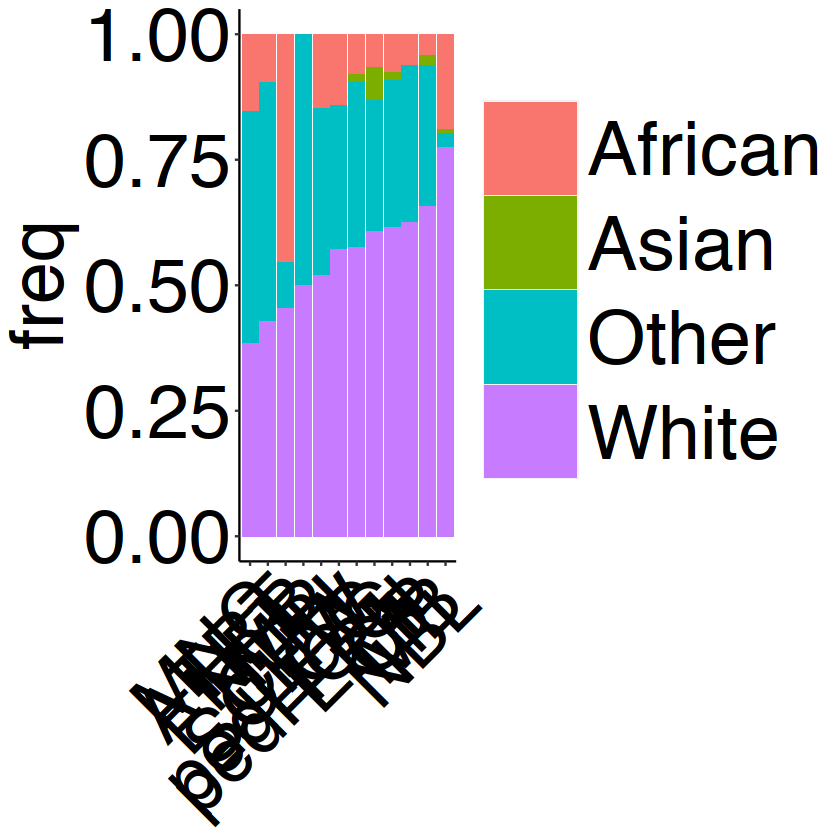

In [56]:
stacked_plots(freqtab, "cohort", "race")

In [57]:
pdf(paste0(plotpath, "race_cohort_plot.pdf"),
   width = 20, height = 10, onefile = F)


stacked_plots(freqtab, "cohort", "race")

dev.off()

pdf 
  2

In [58]:
freqtab <- metadata_race %>% group_by(immune_cluster,race) %>%
summarise(n = n()) %>% mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'immune_cluster'. You can override using the `.groups` argument.



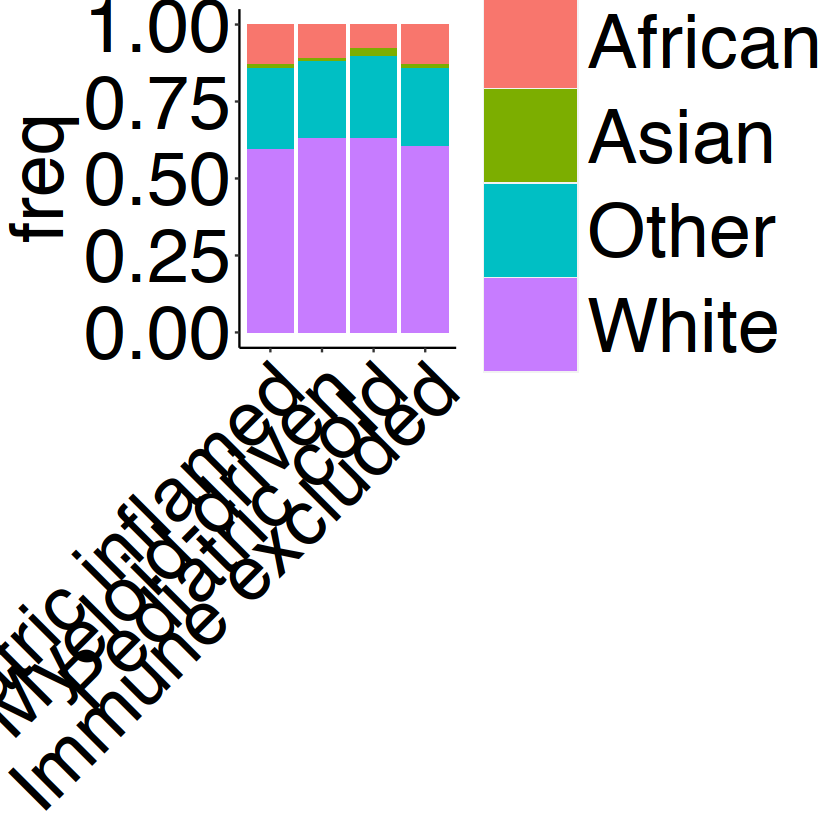

In [59]:
stacked_plots(freqtab, "immune_cluster", "race")

In [60]:
pdf(paste0(plotpath, "race_IC_plot.pdf"),
   width = 12, height = 10, onefile = F)


stacked_plots(freqtab, "immune_cluster", "race")

dev.off()

pdf 
  2

In [61]:
mantelhaen.test(metadata_race$race, 
                metadata_race$immune_cluster,
                metadata_race$cohort)


	Cochran-Mantel-Haenszel test

data:  metadata_race$race and metadata_race$immune_cluster and metadata_race$cohort
Cochran-Mantel-Haenszel M^2 = 5.9473, df = 9, p-value = 0.7452


In [62]:
rms::lrm(race ~ immune_cluster + cohort, data = metadata_race)

Logistic Regression Model
 
 rms::lrm(formula = race ~ immune_cluster + cohort, data = metadata_race)
 
 
 Frequencies of Responses
 
 African   Asian   Other   White 
      75      12     185     443 
 
                       Model Likelihood    Discrimination    Rank Discrim.    
                             Ratio Test           Indexes          Indexes    
 Obs           715    LR chi2     22.94    R2       0.037    C       0.588    
 max |deriv| 3e-13    d.f.           14    g        0.401    Dxy     0.175    
                      Pr(> chi2) 0.0612    gr       1.493    gamma   0.188    
                                           gp       0.043    tau-a   0.094    
                                           Brier    0.107                     
 
                                Coef    S.E.   Wald Z Pr(>|Z|)
 y>=Asian                        1.7407 0.4610  3.78  0.0002  
 y>=Other                        1.5723 0.4588  3.43  0.0006  
 y>=White                        0.0490 0.4531  0.11

# Age

In [63]:
metadata_IC$age_class[ metadata_IC$age_at_diagnosis == 2] <- "Infants"
metadata_IC$age_class[ metadata_IC$age_at_diagnosis == 12] <- "Children"
metadata_IC$age_class[ metadata_IC$age_at_diagnosis == 16] <- "Adolescents"
metadata_IC$age_class[ metadata_IC$age_at_diagnosis == 25] <- "Young adults"

In [64]:
metadata_age <- metadata_IC[!is.na(metadata_IC$age_at_diagnosis),]

In [65]:
table(metadata_age$age_class, metadata_age$immune_cluster)

              
               Pediatric inflamed Myeloid-driven Pediatric cold Immune excluded
  Adolescents                   9             39             59              13
  Adults                        0              2              0               0
  Children                     48            162            215              93
  Infants                      18             46             80              52
  Young adults                 13             28             37               5

In [66]:
table(metadata_race$race, useNA = "always")


African   Asian   Other   White    <NA> 
     75      12     185     443       0 

In [67]:
ageplot <- ggplot(data = metadata_age) + 
geom_boxplot(aes( x = immune_cluster, y = age_at_diagnosis), outlier.shape = NA, fill = "light grey") +
    theme(axis.title.y = element_text(size = 45),
          axis.title.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text.x = element_text(size = 45,angle = 45, hjust = 1, color = "black"),
          axis.text.y = element_text(size = 45, color = "black")) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          plot.background = element_rect(fill = "transparent", colour = NA),
          plot.title = element_text(size = 45)) +
    theme(legend.position = "right", legend.direction="vertical",
          legend.text = element_text(size = 45),
          legend.key.height= unit(2, 'cm'),
          legend.key.width= unit(2, 'cm'),
          legend.title = element_blank())

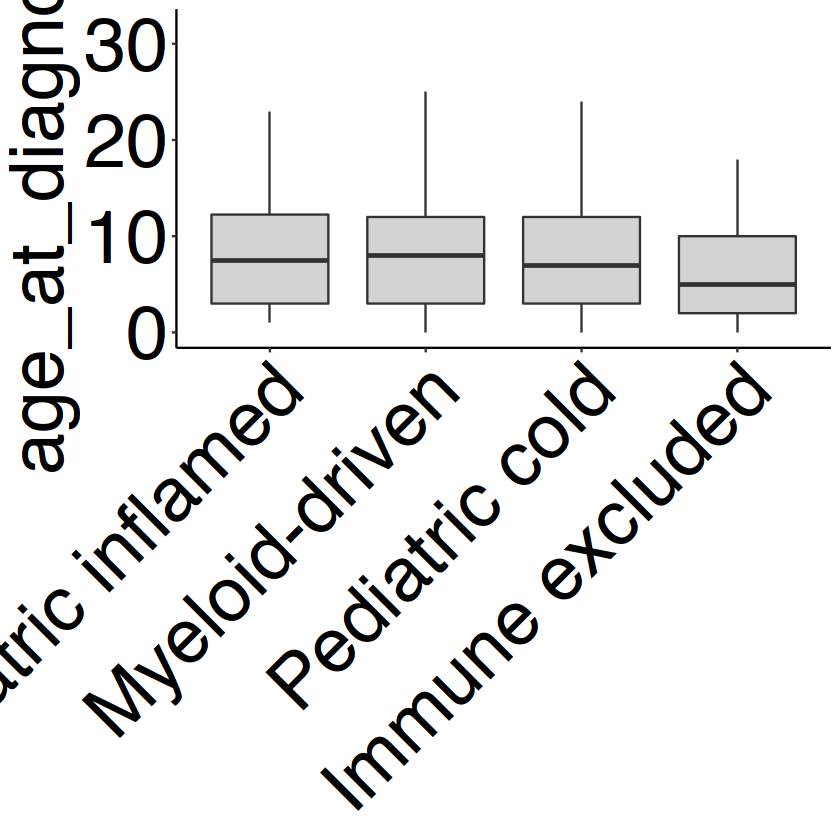

In [68]:
ageplot

In [69]:
pdf(paste0(plotpath, "age_IC_plot.pdf"),
   width = 12, height = 10, onefile = F)


ageplot + labs(y = "Age at diagnosis (years)")

dev.off()

pdf 
  2

In [70]:
tapply(metadata_age$age_at_diagnosis, metadata_age$immune_cluster, summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   7.500   8.656  12.250  23.000 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.00    8.00    8.44   12.00   32.00 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   7.000   8.093  12.000  24.000 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   5.000   6.196  10.000  23.000 


In [71]:
summary.lm(aov(age_at_diagnosis ~ immune_cluster + cohort, metadata_age))


Call:
aov(formula = age_at_diagnosis ~ immune_cluster + cohort, data = metadata_age)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7367  -3.7663  -0.4735   3.0665  22.7997 

Coefficients:
                              Estimate Std. Error t value           Pr(>|t|)
(Intercept)                     2.8208     1.0712   2.633           0.008602
immune_clusterMyeloid-driven   -0.2207     0.6549  -0.337           0.736199
immune_clusterPediatric cold   -0.5035     0.6710  -0.750           0.453262
immune_clusterImmune excluded  -1.0907     0.7371  -1.480           0.139282
cohortCP                        5.4103     1.6282   3.323           0.000927
cohortCPH                       6.2038     1.3795   4.497 0.0000077892355773
cohortEPN                       6.2250     1.1462   5.431 0.0000000720828663
cohortETMR                      0.2026     1.9528   0.104           0.917398
cohortMB                        6.4787     1.0239   6.327 0.0000000003923358
cohortMNG                

In [72]:
mymed <- lapply(unique(metadata_age$cohort), function(x){
    median(metadata_age$age_at_diagnosis[ metadata_age$cohort == x])})

names(mymed) <- unique(metadata_age$cohort)

In [73]:
mymed[order(unlist(mymed))]

$NBL
[1] 2

$ATRT
[1] 2

$CP
[1] 3

$ETMR
[1] 3

$CPH
[1] 8

$pedLGG
[1] 8

$MB
[1] 8

$EPN
[1] 8

$pedHGG
[1] 9

$MNG
[1] 13

$NFB
[1] 17

$SCHW
[1] 18

In [74]:
metadata_age$cohort <- factor(metadata_age$cohort,
                             levels = names(mymed[order(unlist(mymed))]))

In [75]:
ageplot_cohort <- ggplot(data = metadata_age) + 
geom_boxplot(aes( x = cohort, y = age_at_diagnosis), outlier.shape = NA, fill = "light grey") +
    theme(axis.title.y = element_text(size = 45),
          axis.title.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text.x = element_text(size = 45,angle = 45, hjust = 1, color = "black"),
          axis.text.y = element_text(size = 45, color = "black")) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          plot.background = element_rect(fill = "transparent", colour = NA),
          plot.title = element_text(size = 45)) +
    theme(legend.position = "right", legend.direction="vertical",
          legend.text = element_text(size = 45),
          legend.key.height= unit(2, 'cm'),
          legend.key.width= unit(2, 'cm'),
          legend.title = element_blank())

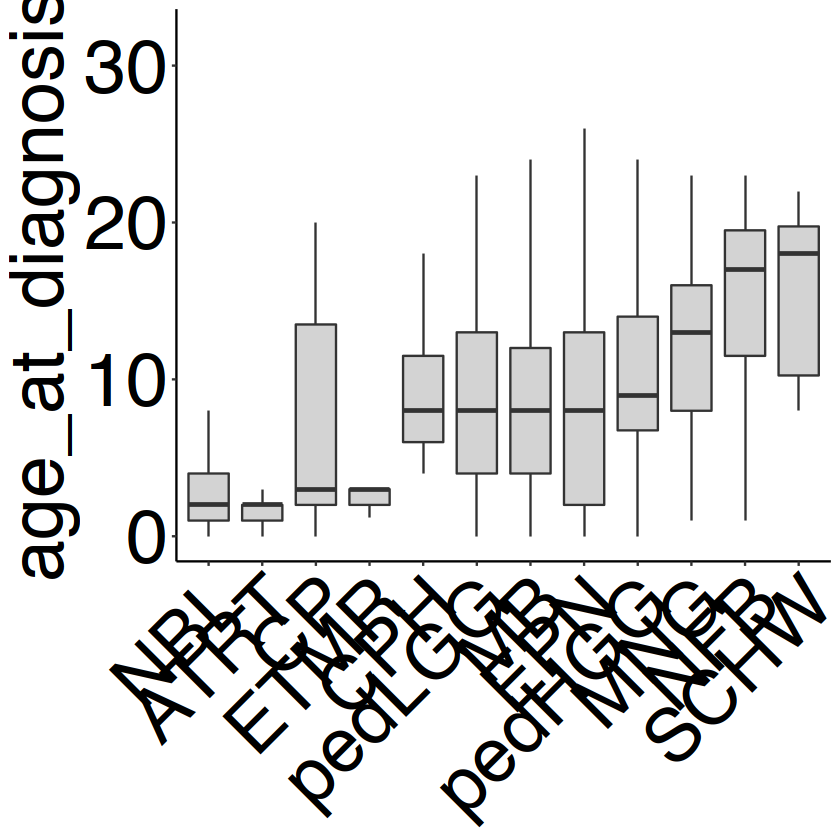

In [76]:
ageplot_cohort

In [77]:
pdf(paste0(plotpath, "age_cohort_boxplot.pdf"),
   width = 20, height = 10, onefile = F)


ageplot_cohort

dev.off()

pdf 
  2

In [78]:
freqtab <- metadata_age %>% group_by(cohort,age_class) %>%
    summarise(n = n()) %>% mutate(freq = n / sum(n)) 

`summarise()` has grouped output by 'cohort'. You can override using the `.groups` argument.



In [79]:
pdf(paste0(plotpath, "age_class_cohort_plot.pdf"),
   width = 20, height = 10, onefile = F)


stacked_plots(freqtab, "cohort", "age_class")

dev.off()

pdf 
  2

# NBL INSS

In [14]:
metadata_IC$recurrence <- as.numeric(metadata_IC$recurrence)

In [18]:
tm <- metadata_IC[ metadata_IC$cohort == "ATRT",]

In [19]:
summary(tm$days_to_death)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   30.0   296.0   510.0   655.9   900.0  2301.0       1 

In [26]:
coxmodel <- coxph(Surv(days_to_progress, recurrence)~ immune_cluster + tumour_subtype+
                  age_at_diagnosis + gender + ethnicity, data= tm) 

summary(coxmodel)

Warning message in fitter(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  9 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(days_to_progress, recurrence) ~ immune_cluster + 
    tumour_subtype + age_at_diagnosis + gender + ethnicity, data = tm)

  n= 21, number of events= 11 
   (9 observations deleted due to missingness)

                                              coef          exp(coef)
immune_clusterC2                         -0.950619           0.386502
immune_clusterC3                         -1.087776           0.336965
immune_clusterC4                         -0.003672           0.996334
tumour_subtypeATRT_SHH                    1.113959           3.046396
tumour_subtypeATRT_TYR                    0.132311           1.141464
age_at_diagnosis                         -0.043065           0.957849
genderMale                               -1.460138           0.232204
ethnicityNot Hispanic or Latino          -1.663954           0.189389
ethnicityReported Unknown                23.863890 23118299991.513664
                                          se(coef)      z Pr(>|z|)  
imm

In [9]:
NBLs <- metadata_IC[metadata_IC$cohort == "NBL",]

In [10]:
NBL_manifest <- read.table(paste0(manifestpath, "TARGET_NBL_Discovery_ClinicalData_20170525.txt"),
                          sep = "\t", na.strings = "", header = T, stringsAsFactors = F)

In [11]:
colnames(NBL_manifest)[colnames(NBL_manifest) == "TARGET.USI"] <- "case_id"

In [12]:
NBL_manifest_subset <- NBL_manifest[NBL_manifest$case_id %in% NBLs$case_id,]

In [13]:
NBLs_MYCstatus <- merge(NBLs, NBL_manifest_subset[, c("case_id", "MYCN.status", "COG.Risk.Group", "INSS.Stage")], 
                        by = "case_id")

In [14]:
dim(NBLs_MYCstatus)

[1] 149  28

In [15]:
table(NBLs_MYCstatus$INSS.Stage, NBLs_MYCstatus$CRI_cluster)

          
           IFN-gamma dominant Inflammatory Lymphocyte depleted Wound Healing
  Stage 3                   0            0                   3             2
  Stage 4                  24           19                  16            47
  Stage 4s                  0            6                   4            11

In [16]:
table(NBLs_MYCstatus$INSS.Stage, NBLs_MYCstatus$immune_cluster)

          
           C1 C2 C3 C4
  Stage 3   1  2  1  1
  Stage 4  19 38 30 36
  Stage 4s  0  4  5 12

In [53]:
tm <- NBLs_MYCstatus[ NBLs_MYCstatus$INSS.Stage == "Stage 3",]

In [54]:
NBLs_MYCstatus$vital_status <- as.numeric(NBLs_MYCstatus$vital_status)

In [64]:
sfit <- survfit(Surv(days_to_death, vital_status)~ CRI_cluster, data=NBLs_MYCstatus)
#KM_plot(tm, sfit, cluster_col, "Immune cluster", "Overall survival", names(cluster_col))

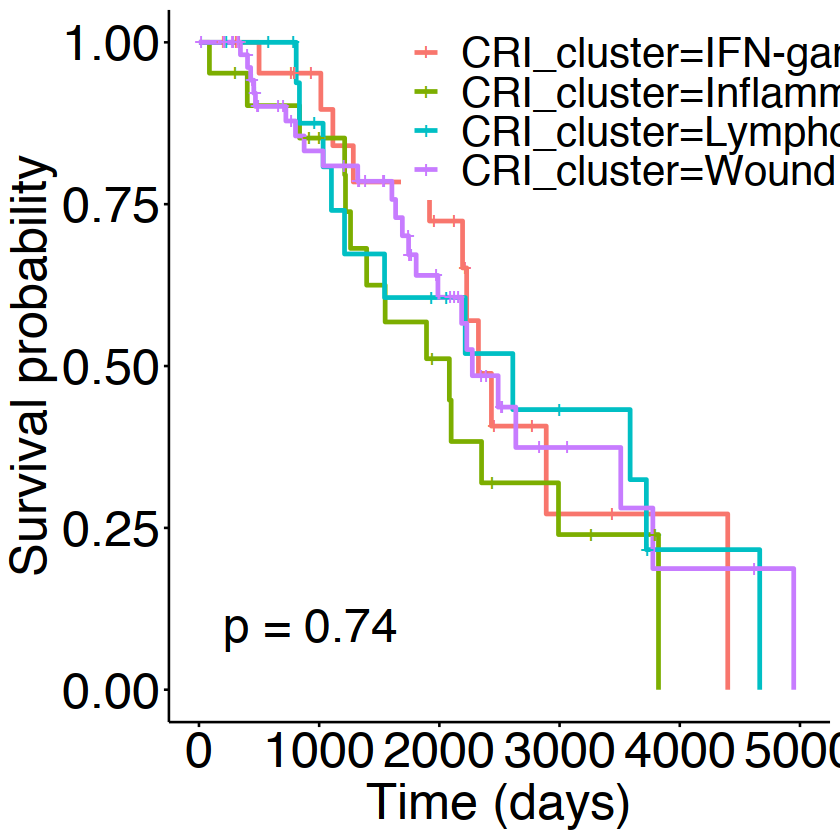

In [65]:
ggsurvplot(sfit, data = NBLs_MYCstatus,
     
                         #Risk table
    
                         # pvalue
                         pval = TRUE, pval.size = 10, pval.coord = c(200, 0.1),
                         # legend
                         legend.title="", font.legend = 25, legend = c(0.9, 0.9),
                         # fonts
                         font.main = 30, font.x = 30, font.y = 30, font.tickslab = 30, 
                         # titles
           xlab = "Time (days)") 